In [1]:
import numpy as np

from sklearn.metrics import classification_report

D:\anacoda\anacoda-install\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anacoda\anacoda-install\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\anacoda\anacoda-install\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
classes = [0, 1, 2, 3, 4, 5,6,7,8,9] # 0~7 对应 HDPE, LDPE, PET, PET, PP, PS, PVC, NO_Plastic, other_resins

In [3]:
y_true = np.array([0]*2182+[1]*486+[2]*1106+[3]*476+[4]*900+[5]*2045+[6]*389+[7]*681+[8]*224+[9]*1714)

In [4]:
#Resnet-11
y_pred =np.array([0]*1699+[1]*32+[2]*299+[3]*1+[4]*1+[5]*15+[6]*18+[7]*15+[8]*42+[9]*60+
                 [0]*30+[1]*251+[2]*46+[3]*2+[4]*53+[5]*4+[6]*0+[7]*28+[8]*22+[9]*50+
                 [0]*172+[1]*8+[2]*762+[3]*3+[4]*20+[5]*43+[6]*0+[7]*0+[8]*93+[9]*5+
                 [0]*5+[1]*16+[2]*17+[3]*422+[4]*0+[5]*14+[6]*0+[7]*2+[8]*0+[9]*0+
                 [0]*35+[1]*27+[2]*73+[3]*4+[4]*686+[5]*5+[6]*6+[7]*14+[8]*2+[9]*48+
                 [0]*49+[1]*3+[2]*67+[3]*37+[4]*7+[5]*1608+[6]*7+[7]*133+[8]*0+[9]*134+
                 [0]*59+[1]*0+[2]*6+[3]*0+[4]*3+[5]*16+[6]*240+[7]*14+[8]*0+[9]*51+
                 [0]*26+[1]*17+[2]*50+[3]*3+[4]*29+[5]*125+[6]*10+[7]*319+[8]*9+[9]*93+
                 [0]*16+[1]*3+[2]*75+[3]*8+[4]*1+[5]*10+[6]*0+[7]*7+[8]*92+[9]*12+
                 [0]*101+[1]*7+[2]*3+[3]*0+[4]*19+[5]*225+[6]*14+[7]*78+[8]*0+[9]*1267
                
                 )

In [5]:
report = classification_report(y_true, y_pred, target_names=['Brick', 'CT', 'Concrete', 'Glass','GB', 'MS','Paper', 'Plastic', 'Stone', 'Wood', ], digits=3)

In [6]:
print(report)

              precision    recall  f1-score   support

       Brick      0.775     0.779     0.777      2182
          CT      0.690     0.516     0.591       486
    Concrete      0.545     0.689     0.609      1106
       Glass      0.879     0.887     0.883       476
          GB      0.838     0.762     0.798       900
          MS      0.779     0.786     0.782      2045
       Paper      0.814     0.617     0.702       389
     Plastic      0.523     0.468     0.494       681
       Stone      0.354     0.411     0.380       224
        Wood      0.737     0.739     0.738      1714

    accuracy                          0.720     10203
   macro avg      0.693     0.665     0.675     10203
weighted avg      0.726     0.720     0.721     10203



In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from scipy import interp
from itertools import cycle

nb_classes = 10 #four categories
y_pred = label_binarize(y_pred, classes=[i for i in range(nb_classes)])  

In [8]:
y_validate = np.array([0]*2182+[1]*486+[2]*1106+[3]*476+[4]*900+[5]*2045+[6]*389+[7]*681+[8]*224+[9]*1714)

y_pred =np.array([0]*1699+[1]*32+[2]*299+[3]*1+[4]*1+[5]*15+[6]*18+[7]*15+[8]*42+[9]*60+
                 [0]*30+[1]*251+[2]*46+[3]*2+[4]*53+[5]*4+[6]*0+[7]*28+[8]*22+[9]*50+
                 [0]*172+[1]*8+[2]*762+[3]*3+[4]*20+[5]*43+[6]*0+[7]*0+[8]*93+[9]*5+
                 [0]*5+[1]*16+[2]*17+[3]*422+[4]*0+[5]*14+[6]*0+[7]*2+[8]*0+[9]*0+
                 [0]*35+[1]*27+[2]*73+[3]*4+[4]*686+[5]*5+[6]*6+[7]*14+[8]*2+[9]*48+
                 [0]*49+[1]*3+[2]*67+[3]*37+[4]*7+[5]*1608+[6]*7+[7]*133+[8]*0+[9]*134+
                 [0]*59+[1]*0+[2]*6+[3]*0+[4]*3+[5]*16+[6]*240+[7]*14+[8]*0+[9]*51+
                 [0]*26+[1]*17+[2]*50+[3]*3+[4]*29+[5]*125+[6]*10+[7]*319+[8]*9+[9]*93+
                 [0]*16+[1]*3+[2]*75+[3]*8+[4]*1+[5]*10+[6]*0+[7]*7+[8]*92+[9]*12+
                 [0]*101+[1]*7+[2]*3+[3]*0+[4]*19+[5]*225+[6]*14+[7]*78+[8]*0+[9]*1267
                
                 )
y_pred = label_binarize(y_pred, classes=[i for i in range(nb_classes)])  

y_validate = label_binarize(y_validate, classes=[i for i in range(nb_classes)])

In [9]:
roc_path = r"E:\manuscipt\sorting_construction\VGG-Construction\Figure\VGG_19_with_TL.jpg"   #image saved path

In [10]:
fpr = dict()   #false positive rate
tpr = dict()   #True Positive Rate
roc_auc = dict()
    
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validate[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [11]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_validate.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [12]:
# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nb_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
        
for i in range(nb_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= nb_classes
        
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
lw = 2  #line width
plt.figure()        

<ipython-input-12-6463adfbbb46>:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

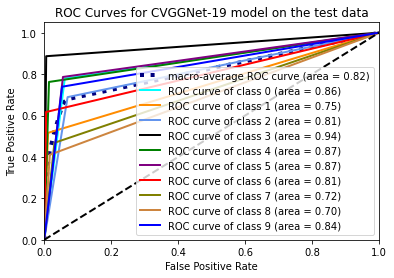

In [13]:
#与表格一样，micro-average 和macro-average 是两种方法计算的总体平均，可以选其中一个，把另一个的代码句注释掉即可
# plt.plot(fpr["micro"], tpr["micro"],
#                  label='micro-average ROC curve (area = {0:0.2f})'
#                  ''.format(roc_auc["micro"]),
#                  color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','black','green',
               'purple','red','olive','peru','blue'])
        
for i, color in zip(range(nb_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
            
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CVGGNet-19 model on the test data')
plt.legend(loc="lower right")
plt.savefig(roc_path, dpi=300)
plt.show()